In [4]:
# Get all data points for all parameters
# from output .dat files

# after "=" write path to the .dat file with Pk data (..._pk) or Cl data (..._cl)
# Output files (from .ini files above) I used are in PT-check/class/test_output/
# for example, lcdm_pk = "/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat"

# for LCDM
fiducial_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_linear_cl_lensed.dat")[:,:]

# for dmeff
dmeff_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_dmeff_linear_cl_lensed.dat")[:,:]

#for omega_b              
omega_b_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_omega_b_linear_cl_lensed.dat")[:,:]
omega_b_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_omega_b_linear_cl_lensed.dat")[:,:]

#for omega_cdm             
omega_cdm_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_omega_cdm_linear_cl_lensed.dat")[:,:] 
omega_cdm_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_omega_cdm_linear_cl_lensed.dat")[:,:] 

#for tau              
tau_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_tau_linear_cl_lensed.dat")[:,:] 
tau_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_tau_linear_cl_lensed.dat")[:,:]

#for h             
h_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_h_linear_cl_lensed.dat")[:,:] 
h_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_h_linear_cl_lensed.dat")[:,:]

#for As              
As_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_As_linear_cl_lensed.dat")[:,:] 
As_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_As_linear_cl_lensed.dat")[:,:]

#for ns              
ns_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_ns_linear_cl_lensed.dat")[:,:] 
ns_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_ns_linear_cl_lensed.dat")[:,:]




In [5]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # I use a Mac

import numpy as np
import matplotlib.pyplot as plt
import fishchips.experiments_change as experiments
from fishchips.cosmo import Observables
import fishchips.util


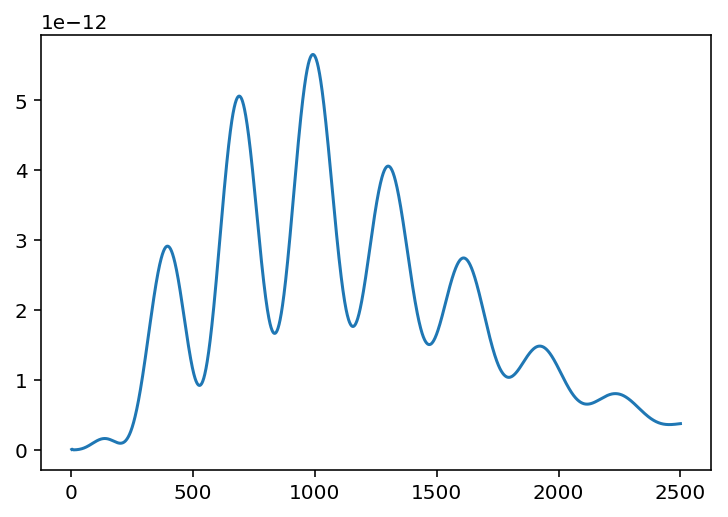

In [6]:
plt.figure()
plt.plot(fiducial_data[:, 0], fiducial_data[:,2])

In [7]:
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s'])
centers = np.array([0.02230,  0.1188,  0.6774,  2.142e-9, 0.9619])
steps = np.array([0.0002230,  0.001188,  0.006774,  2.142e-11, 0.009619])

In [8]:
fiducial = {}
dmeff = {}       
omega_b_l = {}
omega_b_r = {} 
omega_cdm_l = {} 
omega_cdm_r = {}             
tau_l = {}
tau_r = {}           
h_l = {}
h_r = {}            
As_l = {}
As_r = {} 
ns_l = {}
ns_r = {}

channels = ['ell', 'tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ep']
for i in channels:
    for j in range(8):
        fiducial[i] = fiducial_data[:, j]
        dmeff[i] = dmeff_data[:, j]       
        
        omega_b_l[i] = omega_b_l_data[:, j] 
        omega_b_r[i] = omega_b_r_data[:, j] 
        
        omega_cdm_l[i] = omega_cdm_l_data[:, j]  
        omega_cdm_r[i] = omega_cdm_r_data[:, j]              
        
        tau_l[i] = tau_l_data[:, j]
        tau_r[i] = tau_r_data[:, j]             
        
        h_l[i] = h_l_data[:, j] 
        h_r[i] = h_r_data[:, j]             
        
        As_l[i] = As_l_data[:, j] 
        As_r[i] = As_r_data[:, j]
        
        ns_l[i] = ns_l_data[:, j] 
        ns_r[i] = ns_r_data[:, j]

        

In [9]:
cl_left = []
cl_right = []

#pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'z_reio', 'sigma'])

cl_left.append(omega_b_l)
cl_left.append(omega_cdm_l)
cl_left.append(h_l)
cl_left.append(As_l)
cl_left.append(ns_l)
#cl_left.append(tau_l)
#cl_left.append(fiducial)

cl_right.append(omega_b_r)
cl_right.append(omega_cdm_r)
cl_right.append(h_r)
cl_right.append(As_r)
cl_right.append(ns_r)
#cl_right.append(tau_r)
#cl_right.append(dmeff)

#cl_right[1]['tt']

In [10]:
# calculate derivatives
def get_deriv(fid_cl, params, cl_right, cl_left, stepsize):
    '''
    params - dictionary with parameters
    param - [string] parameter you would want to vary, e.g. 'h'
    stepsize - [float/int] a step away from the point of calculating derivative
    '''
    Tcmb = 2.7255
    fid = {'tt': (Tcmb*1.0e6)**2 * fid_cl['tt']/fid_cl['ell']/(fid_cl['ell']+1),
           'te': (Tcmb*1.0e6)**2 * fid_cl['te']/fid_cl['ell']/(fid_cl['ell']+1),
           'ee': (Tcmb*1.0e6)**2 * fid_cl['ee']/fid_cl['ell']/(fid_cl['ell']+1)}
    df = {}
    # loop over parameters, and compute derivatives
    for i in range(len(params)):
        for spec_xy in ['tt', 'te', 'ee']:
            df[params[i] + '_' + spec_xy] = (Tcmb*1.0e6)**2 *(cl_right[i][spec_xy] - cl_left[i][spec_xy]) / (2*stepsize[i])/cl_right['ell']/(cl_right['ell']+1)
    
    return fid, df, params           
    

In [11]:
from matplotlib.patches import Ellipse

ALPHA1 = 1.52
ALPHA2 = 2.48
ALPHA3 = 3.44
PLOT_MULT = 4.
def get_ellipse(par1, par2, params, cov, scale1=1, scale2=1):
    """
    Extract ellipse parameters from covariance matrix.
    Parameters
    ----------
        par1 (string): name of parameter 1
        par2 (string): name of parameter 2
        params (list of strings): contains names of parameters to constrain
        cov (numpy array): covariance matrix
    Return
    ------
        tuple, ellipse a, b, angle in degrees, sigma_x, sigma_y, sigma_xy
    """
    # equations 1-4 Coe 2009. returns in degrees
    # first look up indices of parameters
    pind = dict(zip(params, list(range(len(params)))))
    i1 = pind[par1]
    i2 = pind[par2]
    sigma_x2 = cov[i1, i1] * scale1*scale1
    sigma_y2 = cov[i2, i2] * scale2*scale2
    sigma_xy = cov[i1, i2] * scale1*scale2

    if ((sigma_y2/sigma_x2) < 1e-10) or ((sigma_x2/sigma_y2) < 1e-10):
        a2 = max(sigma_x2, sigma_y2) + sigma_xy**2 / max(sigma_x2, sigma_y2)
        b2 = min(sigma_x2, sigma_y2) - sigma_xy**2 / max(sigma_x2, sigma_y2)
    else:
        a2 = (sigma_x2+sigma_y2)/2. + np.sqrt((sigma_x2 - sigma_y2)**2/4. +
                                              sigma_xy**2)
        b2 = (sigma_x2+sigma_y2)/2. - np.sqrt((sigma_x2 - sigma_y2)**2/4. +
                                              sigma_xy**2)
    angle = np.arctan(2.*sigma_xy/(sigma_x2-sigma_y2)) / 2.
    if (sigma_x2 < sigma_y2):
        a2, b2 = b2, a2

    return np.sqrt(a2), np.sqrt(b2), angle * 180.0 / np.pi, \
            np.sqrt(sigma_x2), np.sqrt(sigma_y2), sigma_xy

In [12]:
def plot_ellipse(ax, par1, par2, parameters_set, fiducial_set, cov, color='black',
                 resize_lims=True, positive_definite=[], one_sigma_only=False,
                 scale1=1, scale2=1, ls1='--', ls2='-'):
    """
    Plot 1 and 2-sigma ellipses, from Coe 2009.
    Parameters
    ----------
        ax (matpotlib axis): axis upon which the ellipses will be drawn
        par1 (string): parameter 1 name
        par2 (string): parameter 2 name
        obs (Observables object): contains names of parameters to constrain, etc
        cov (numpy array): covariance matrix
        color (string): color to plot ellipse with
        resize_lims (boolean): flag for changing the axis limits
        positive_definite (list of string): convenience input,
            parameter names passed in this list will be cut off at 0 in plots.
        scale1 and scale2 are for plotting scale
    Returns
    -------
        list of float : sigma_x, sigma_y, sigma_xy for judging the size of the
            plotting window
    """
    params = parameters_set
    pind = dict(zip(params, list(range(len(params)))))
    i1 = pind[par1]
    i2 = pind[par2]
    a, b, theta, sigma_x, sigma_y, sigma_xy = get_ellipse(
        par1, par2, params, cov, scale1, scale2)

    fid1 = fiducial_set[i1] * scale1
    fid2 = fiducial_set[i2] * scale2

    if not one_sigma_only:
        e1 = Ellipse(
            xy=(fid1, fid2),
            width=a * 2 * ALPHA2, height=b * 2 * ALPHA2,
            angle=theta, edgecolor=color, lw=2, facecolor='none', ls=ls2)
        ax.add_artist(e1)
        e1.set_clip_box(ax.bbox)

    # 1-sigma ellipse
    e2 = Ellipse(
        xy=(fid1, fid2),
        width=a*2*ALPHA1, height=b*2*ALPHA1,
        angle=theta, edgecolor=color, lw=2, facecolor='none', ls=ls1)
    ax.add_artist(e2)
    e2.set_alpha(1.0)
    e2.set_clip_box(ax.bbox)

    if resize_lims:
        if par1 in positive_definite:
            ax.set_xlim(max(0.0, -PLOT_MULT*sigma_x),
                        fid1+PLOT_MULT*sigma_x)
        else:
            ax.set_xlim(fid1 - PLOT_MULT * sigma_x,
                        fid1 + PLOT_MULT * sigma_x)
        if par2 in positive_definite:
            ax.set_ylim(max(0.0, fid2 - PLOT_MULT * sigma_y),
                        fid2 + PLOT_MULT * sigma_y)
        else:
            ax.set_ylim(fid2 - PLOT_MULT * sigma_y,
                        fid2 + PLOT_MULT * sigma_y)

    return sigma_x, sigma_y, sigma_xy

In [13]:

def plot_ell(parameters_set, fiducial_set, cov, positive_definite = [], color='black'):

    nparams = len(parameters_set)
    scales = np.ones(nparams)

    print('generating new axis')
    f, ax = plt.subplots(nparams, nparams, figsize=(12, 12))


    labels = [(r'$\mathrm{' + p.replace('_', r'\_') + r'}$')
              for p in parameters_set]
    print(labels)
    # stitch together axes to row=nparams-1 and col=0
    # and turn off non-edge
    for ii in range(nparams):
        for jj in range(nparams):
            if ii == jj:
                ax[jj, ii].get_yaxis().set_visible(False)
                if ii < nparams-1:
                    ax[jj, ii].get_xaxis().set_ticks([])

            if ax[jj, ii] is not None:
                if ii < jj:
                    if jj < nparams-1:
                        ax[jj, ii].set_xticklabels([])
                if ii > 0:
                        ax[jj, ii].set_yticklabels([])

                if jj > 0:
                    # stitch axis to the one above it
                    if ax[0, ii] is not None:
                        ax[jj, ii].get_shared_x_axes().join(ax[jj, ii], ax[0, ii])
                elif ii < nparams-1:
                    if ax[jj, nparams-1] is not None:
                        ax[jj, ii].get_shared_y_axes().join(ax[jj, ii], ax[jj, nparams-1])
                        
    # call plot_ellipse
    for ii in range(nparams):
        for jj in range(nparams):
            if ax[jj, ii] is not None:
                if ii < jj:
                    plot_ellipse(ax[jj, ii], parameters_set[ii],
                                    parameters_set[jj], parameters_set, fiducial_set, cov, color=color,
                                    positive_definite=positive_definite,
                                    scale1=scales[ii], scale2=scales[jj])
                    if jj == nparams-1:
                        ax[jj, ii].set_xlabel(labels[ii], labelpad=30)
                        for tick in ax[jj, ii].get_xticklabels():
                            tick.set_rotation(45)
                    if ii == 0:
                        ax[jj, ii].set_ylabel(labels[jj])
                elif ii == jj:
                    # plot a gaussian if we're on the diagonal
                    sig = np.sqrt(cov[ii, ii])
                    if parameters_set[ii] in positive_definite:
                        grid = np.linspace(
                            fiducial_set[ii],
                            fiducial_set[ii] + PLOT_MULT * sig, 100)
                    else:
                        grid = np.linspace(
                            fiducial_set[ii] - PLOT_MULT*sig,
                            fiducial_set[ii] + PLOT_MULT*sig, 100)
                    posmult = 1.0
                    if parameters_set[ii] in positive_definite:
                        posmult = 2.0
                    ax[jj, ii].plot(grid,
                                    posmult * np.exp(
                                        -(grid-fiducial_set[ii])**2 /
                                        (2 * sig**2)) / (sig * np.sqrt(2*np.pi)),
                                    '-', color=color)
                    if ii == nparams-1:
                        ax[jj, ii].set_xlabel(labels[ii], labelpad=30)
                else:
                    ax[jj, ii].axis('off')

In [14]:
example_Planck = experiments.CMB_Primary(theta_fwhm=[7.], sigma_T=[33.], sigma_P=[56.],
    f_sky=0.65, l_min=2, l_max=2500)
#fisher = example_Planck.get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)+example_Planck[1].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)+example_Planck[2].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
fisher = example_Planck.get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
cov = np.linalg.inv(fisher)

2


LinAlgError: Singular matrix

In [15]:
cc = np.array([[-3.58858819e+024, -3.58858819e+024,  0.00000000e+000],
 [-3.58858819e+024,  1.20883111e+192,  0.00000000e+000],
 [ 0.00000000e+000,  0.00000000e+000 , 7.42835025e+012]])
ccinv = np.linalg.inv(cc)

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$']


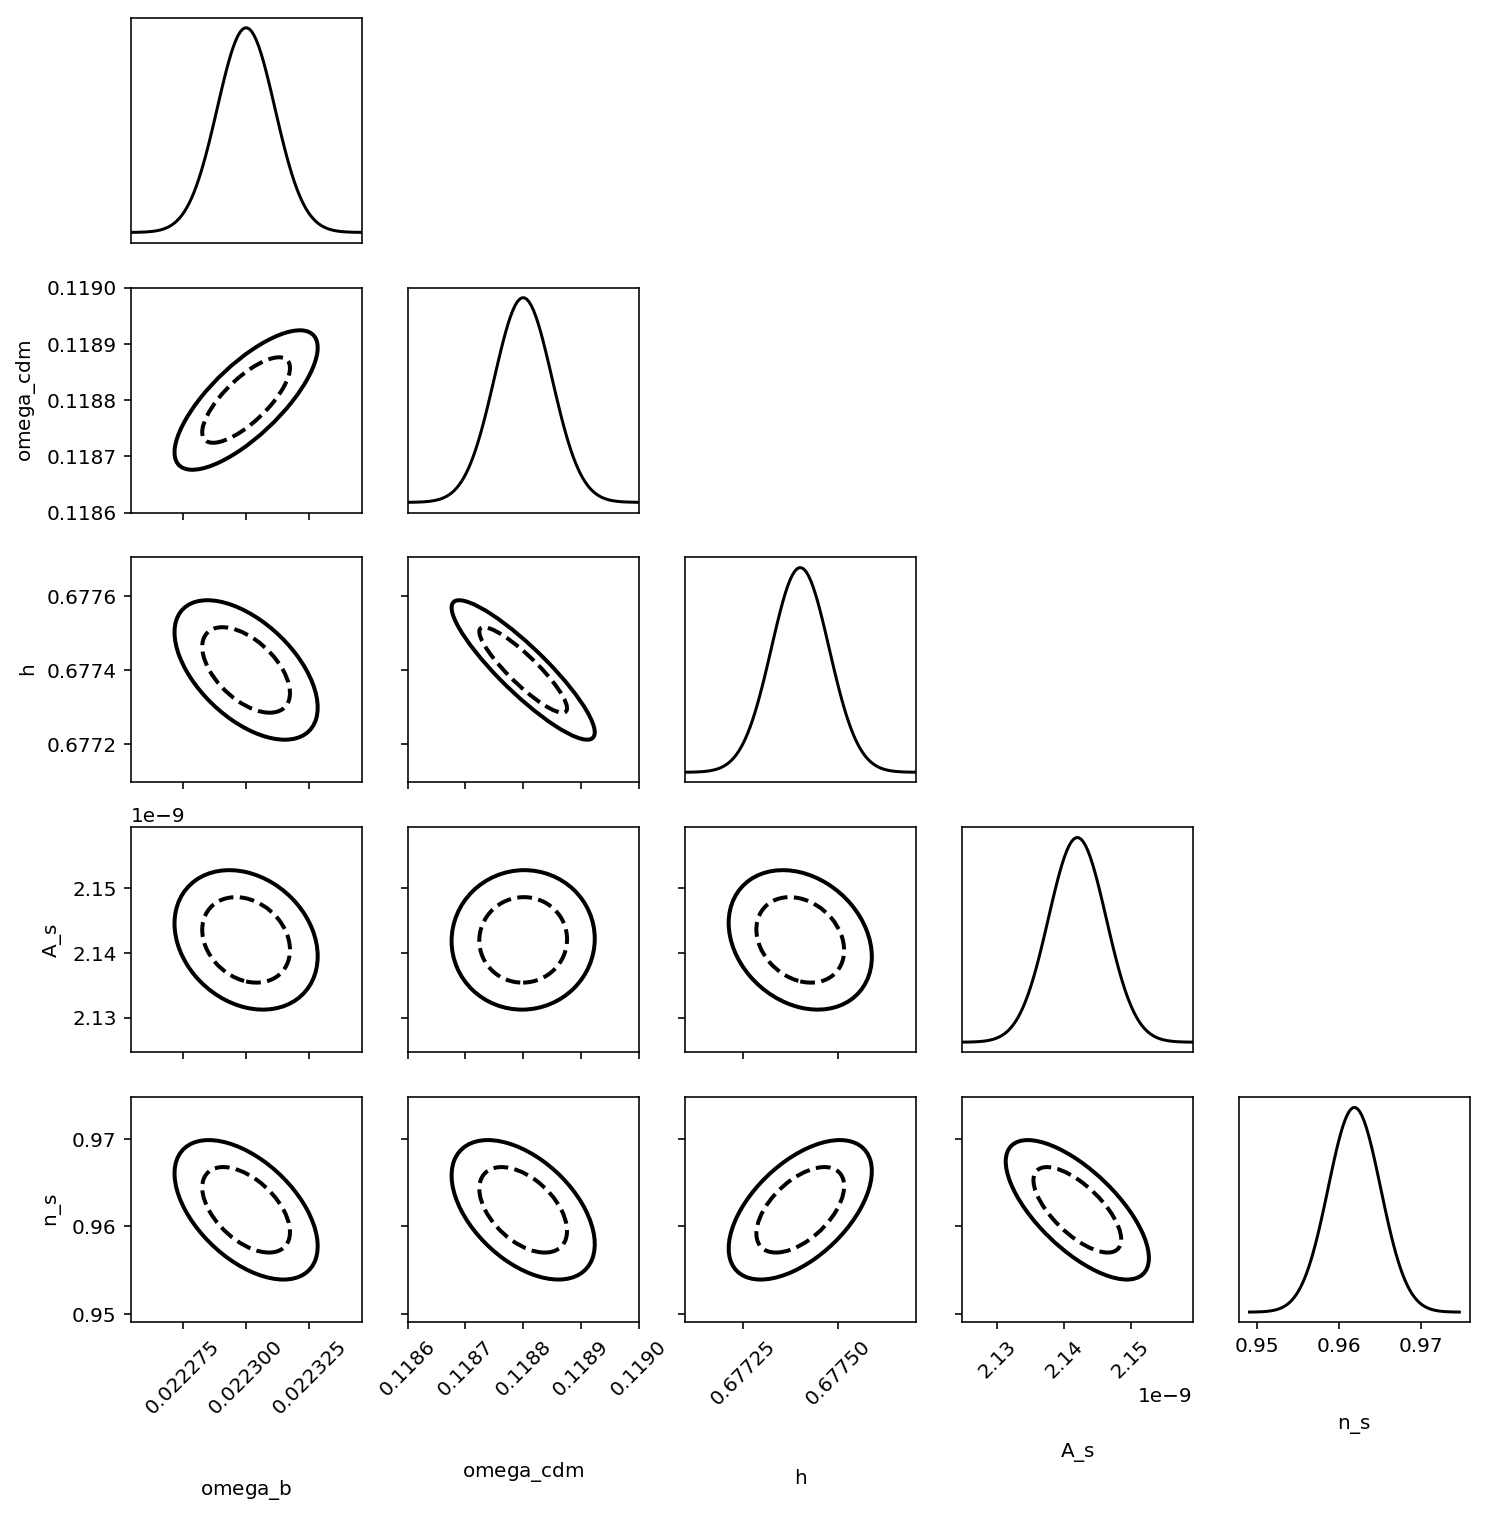

In [43]:
plot_ell(pars, centers, cov)